In [ ]:
#!pip install pyshark

In [4]:
!pip install tornado==4.5.3

  Using cached https://files.pythonhosted.org/packages/0a/29/01057551db50f718fda2afa0e42abdfccca4f8b18fa6163c59588ae8e991/tornado-4.5.3-cp36-cp36m-win_amd64.whl
  Found existing installation: tornado 5.0
    Uninstalling tornado-5.0:


distributed 1.26.0 has requirement tornado>=5, but you'll have tornado 4.5.3 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tornado-5.0.dist-info\\DESCRIPTION.rst'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import pyshark
from IPython.display import Image

OSI Images from https://en.wikipedia.org/wiki/OSI_model

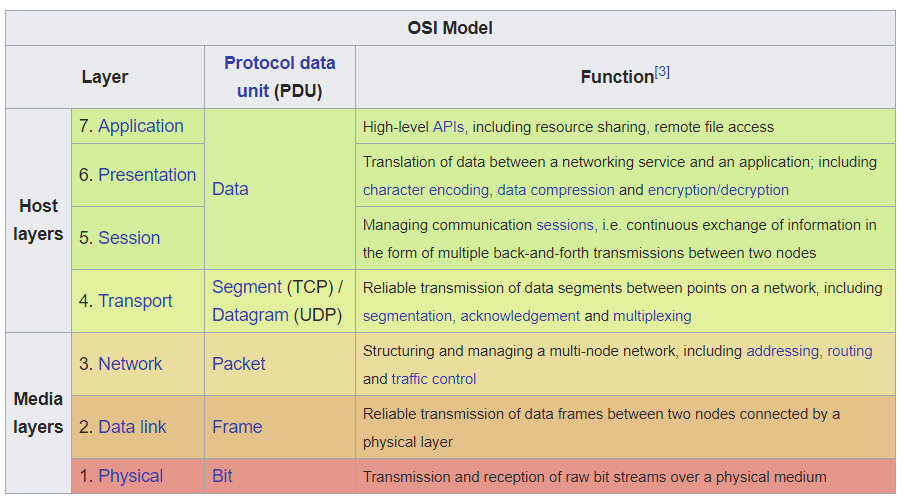

In [2]:
Image('OSIlayers.png')

In [ ]:
Image('ProtocolExamples.png')

Ref: ECE 422/CS 461 Intro to Computer Security

In [ ]:
Image('NetworkLayers.png')

## Task 1
Security analysts and attackers both frequently study network traffic to search for vulnerabilities and to characterize network behavior.  In this section, you will examine network traces from a sample network we set up for this assignment.  

### HTTP Traffic
The attacker starts by probing for a vulnerable Apache Struts web server. 
Using the http packet capture provided, perform the following tasks:

1. The vulnerable server runs an Apache Struts web server. 
   * Identify the IP address of the vulnerable server
   * Identify the port of the vulnerable server

2. In this scenario, while legitimate users browse the Apache Struts web server, an attacker probes for vulnerability in Apache Struts.
   * Plot a timeline of all HTTP requests to the Apache Struts web server with the x axis is the Unix timestamp. Annotate each HTTP request with its path. 
   * Plot a histogram of the path of all HTTP requests to the Apache Struts web server. The x axis is the path of an HTTP request, and the y axis is its count.
   * Compute the time between HTTP requests (in second). Plot a boxplot of time between HTTP requests. 
3. The attacker crafts malicious HTTP requests to exploit the Apache Struts web server. Such requests have an abnormally long values in their Content-Type header.
   * Collect a list that contains the value of the Content-Type headers
   * Plot a CDF of the length of Content-Type header
   * Provide a list of UNIX commands are present in the Content-Type header. Interpret the utility of such commands, i.e., how such commands help an attacker to achieve the objective.
4. Based on your analysis
   * Identify the IP address of the attacker
   * Identify the ports that the attacker use to send malicious HTTP requests


## useful link: https://thepacketgeek.com/pyshark-using-the-packet-object/

#### Let's take a look at the http pcap file

In [2]:
cap = pyshark.FileCapture('http.pcap', keep_packets=True)

In [3]:
cap.load_packets()

RuntimeError: Cannot run the event loop while another loop is running

#### How many packets do we have?

In [ ]:
len(cap)

#### Weird...let's try indexing into the capture object

In [ ]:
cap[5].show()

#### Next, we'll inspect the contents of a packet

In [ ]:
cap[2]

#### Let's see what 'layers' tells us

In [ ]:
cap[2].layers

#### Okay, what about inspecting individual layers?

In [ ]:
dir(cap[2])

In [ ]:
dir(cap[2].ip)

In [ ]:
cap[2].ip.src, cap[2].ip.dst

In [ ]:
dir(cap[2].tcp)

In [ ]:
cap[2].tcp.srcport,cap[2].tcp.dstport

Port 8080 is commonly used as proxy and caching port. It is also above the service port range. Port 8080 also can run a Web server as a nonroot user.
### Ref: https://www.quora.com/What-is-port-8080-used-for

#### Four layers, ETH, IP, TCP, and HTTP

In [ ]:
ETH = 0
IP = 1
TCP = 2
HTTP = 3
cap[2][ETH].pretty_print()

In [ ]:
cap[2][IP]

In [ ]:
cap[2].ip

In [ ]:
cap[2][TCP]

In [ ]:
cap[2].tcp

#### Lets extract the destination IP address and port

In [ ]:
dest_ip = cap[2][IP].dst
dest_port = cap[2][TCP].dstport
print(dest_ip, ':',dest_port)

#### Extract necessary http traffic information, especially "request_uri" header into dataframe

In [ ]:
df_data = []
for pkt in cap:
    if len(pkt.layers) < 4:
        continue
    if pkt[3].layer_name != 'http':
        continue
    #print(dir(pkt[HTTP]._all_fields))
    #break
    try:
        d = {
            'timestamp': pkt.sniff_time.timestamp(),
            'dest_ip': pkt[IP].dst,
            'dest_port': pkt[TCP].dstport,
            'get':pkt.http.request_uri
        }
        df_data.append(d)
    except:
        continue

In [ ]:
df_data

In [ ]:
df = pd.DataFrame(df_data)
#df.to_csv("http_df.csv", sep='\t')

In [ ]:
(df)
#print(len(df))

In [ ]:
df.groupby(['dest_ip', 'dest_port']).count()

In [ ]:
df['dest_ip'].unique()